<a href="https://colab.research.google.com/github/goulu/Goulib/blob/develop/examples/OACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimisation de l'Avance des Coureurs à Pied

Ph. Guglielmetti, 2019

-       De la longueur du parcours commun en début de course : 2km
-       De la longueur du parcours commun en fin de course : 2km (avec le dernier kilomètre = ok pour dépassement)
-       Du temps min et max des marcheurs 5 km (min 41 :00, max 01 :20 :00)
-       Du temps min et max des coureurs 5 km (min 21 :00, max 48 :00)
-       Du temps min et max des marcheurs 11 km (min 01 :29 :00, max 02 :21 :00)
-       Du temps min et max des coureurs 11 km (min 44 :00, max 01 :59 :00)

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install Goulib

In [0]:
from Goulib.drawing import Drawing, Group, Trans
from Goulib.geom import Polygon
from Goulib.notebook import *

In [0]:
track = [0, 2, -2, -1, -0.0001] # positions along the track, negative if relative to distance

In [0]:
class Runner:
    def __init__(self, name, dist, time):
        self.name = name
        self.dist = dist
        self.time = time

    def mark(self, pos=None):
        ''' time when runner will be at pos'''
        if pos is None: pos=self.dist
        if pos < 0: pos = self.dist + pos
        return self.time * pos / self.dist


class Cat:
    def __init__(self, name, dist, min, max, color):
        self.min = Runner(name + ' min', dist, min)
        self.max = Runner(name + ' max', dist, max)
        self.color = color

    def polygon(self, start=0):
        res = Group()
        from Goulib.itertools2 import groups
        for a in groups(track, 2):
            a, b = a[0], a[1]
            o = 0 if a >= 0 else 5
            s = 10
            res.append(
                Polygon([
                    (start + self.min.mark(a), s * (a + o)),
                    (start + self.max.mark(a), s * (a + o)),
                    (start + self.max.mark(b), s * (b + o)),
                    (start + self.min.mark(b), s * (b + o))
                ]), color=self.color
            )
        return res

    def time(self,start=0):
        return start+self.max.mark()

In [0]:
cat = [
    Cat('course', 5, 21, 48,'red'), 
    Cat('course', 11, 44, 119,'green'), 
    Cat('marche', 5, 41, 80,'blue'), 
    Cat('marche', 11, 89, 141,'cyan'),
]

running time 171 minutes


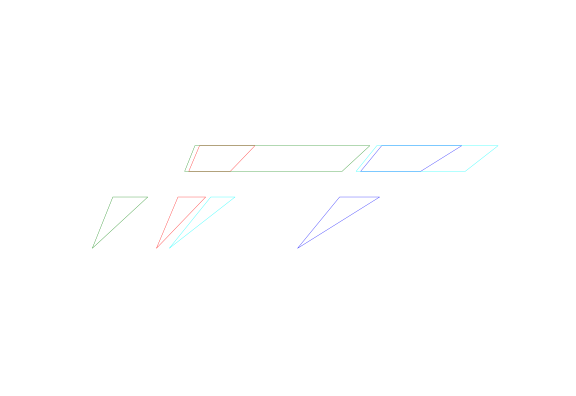

In [20]:
# la dernière ligne start=[...] écrase les précédents, pour expérimenter rapidement
# faire [Ctrl-Return] pour recalculer

start=[0,0,80,30] # V2
start=[25,0,80,30] # V2 avec arrivée simultanée des coureurs plutôt que départ

d=Drawing()
for s,c in zip(start,cat):
    d.append(c.polygon(s))
print('running time %d minutes' % max([c.time(start[i]) for i,c in enumerate(cat)]))
d